# Project: Wrangling and Analyze Data

## Data Gathering

In [3]:
import numpy as np
import pandas as pd
import requests
import json
import os

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)


folder1 = 'img_pred'
if not os.path.exists(folder1):
    os.makedirs(folder1)
    
with open(os.path.join(folder1,url.split('/')[-1]), mode = 'wb') as form:
    form.write(response.content)

In [4]:
os.listdir(folder1)

['image-predictions.tsv']

In [5]:
df2 = pd.read_csv('image-predictions.tsv', sep = '\t')

In [7]:
tweets = []

with open('tweet-json.txt') as form:
    for line in form:
        tweets.append(json.loads(line))

In [8]:
df3 = pd.DataFrame(tweets)

In [9]:
column_of_interest = ['id','retweet_count','favorite_count']
df3 = df3[column_of_interest]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Assessing Data

### Quality issues

1. All retweet colums df

2. Misrepresentation of data for df

3. Data type for column 1 in df

4. Unnecessary columns in df

5. Ratings column in df

6. Only dogs in p1_dog,p2_dog,p3_dog df2

7. Misrepresentation of data for df2

8. Data type for column 1 in df2

9. Data type for column 1 in df3

10. Inconsistent column names

### Tidiness issues
1. Dog stages columns

2. All variables in one dataset

## Cleaning Data

In [13]:
# Make copies of original pieces of data
dfa = df.copy()
df2a = df2.copy()
df3a = df3.copy()

### Issue #1:

#### Define:
Given that I only need original columns, I would limit the dataset to it

#### Code

In [14]:
dfa.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1188,718454725339934721,NaN,NaN,2016-04-08 15:05:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pic is old but I hadn't seen it until tod...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718454725...,13,10,None,None,None,None,None
367,828770345708580865,NaN,NaN,2017-02-07 01:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. He's your Lyft for tonight. Kin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828770345...,13,10,Alfie,None,None,None,None
1170,720775346191278080,NaN,NaN,2016-04-15 00:46:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Berkeley. He's in a predicament. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720775346...,10,10,Berkeley,None,None,None,None
1633,684241637099323392,NaN,NaN,2016-01-05 05:14:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Obi. He got camera shy. 12/10 https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684241637...,12,10,Obi,None,None,None,None
257,843856843873095681,NaN,NaN,2017-03-20 16:08:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sadie and Daisy. They do all thei...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843856843...,12,10,Sadie,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None
69,879050749262655488,NaN,NaN,2017-06-25 18:56:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He has trouble relating to oth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879050749...,11,10,Steven,None,None,None,None
1319,706516534877929472,NaN,NaN,2016-03-06 16:27:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please enjoy this pup in a cooler. Permanently...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706516534...,12,10,None,None,None,None,None
1084,738402415918125056,NaN,NaN,2016-06-02 16:10:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Don't talk to me or my son ever again"" ...10/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/738402415...,10,10,None,None,None,None,None
1740,679503373272485890,NaN,NaN,2015-12-23 03:26:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dwight. He's a pointy pupper. Very doc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679503373...,8,10,Dwight,None,None,pupper,None


In [15]:
dfa = dfa[dfa['retweeted_status_id'].isnull()]

#### Test

In [139]:
dfa.head(5)

,tweet_id,source,text,expanded_urls,name,dog_stage,ratings
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,np.nan,1.3
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,np.nan,1.3
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,np.nan,1.2
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,np.nan,1.3
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,np.nan,1.2


### Issue #2(Quality): Misrepresentation of data

### Define: 


Replace the None(s) in the different dog stages with NaN which is the standard in python

### Code:

In [17]:

dfa.doggo.replace('None','',inplace = True)
dfa.floofer.replace('None','',inplace = True)
dfa.pupper.replace('None','',inplace = True)
dfa.puppo.replace('None','',inplace = True)

#### Test

In [140]:
dfa.head()

,tweet_id,source,text,expanded_urls,name,dog_stage,ratings
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,np.nan,1.3
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,np.nan,1.3
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,np.nan,1.2
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,np.nan,1.3
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,np.nan,1.2


### Issue #1 (Tidiness): Combining the dog stages

### Define:

Combine the different dog stages into one column

In [19]:
### Code:

dfa['dog_stage'] = dfa['doggo'] + dfa['floofer'] + dfa['pupper'] + dfa['puppo']
dfa.dog_stage.replace('','np.nan',inplace = True)

### Test:

In [20]:
dfa.dog_stage.value_counts()

np.nan          1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

### Issue #3(Quality): Misrepresentation of data 

### Define:

Given that I need just the data that discussed dog ratings, using the name column i would replace every data that is not a name with None for consistency in the column before replacing all None(s) with NaN

In [21]:
dfa.name.value_counts()

None          680
a              55
Lucy           11
Charlie        11
Cooper         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 956, dtype: int64

In [22]:
### Code:

dfa.name.replace('a','None', inplace = True)
dfa.name.replace('an','None', inplace = True)
dfa.name.replace('very','None', inplace = True)
dfa.name.replace('getting','None', inplace = True)
dfa.name.replace('actually','None', inplace = True)
dfa.name.replace('quite','None', inplace = True)
dfa.name.replace('the','None', inplace = True)
dfa.name.replace('officially','None', inplace = True)
dfa.name.replace('not','None', inplace = True)
dfa.name.replace('one','None', inplace = True)
dfa.name.replace('this','None', inplace = True)

dfa.name.replace('None','',inplace = True)
dfa.name.replace('','np.nan', inplace = True)

### Test:

In [23]:
dfa.name.value_counts()

np.nan        768
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Bonaparte       1
Wishes          1
Rose            1
Theo            1
Christoper      1
Name: name, Length: 945, dtype: int64

### Issue #4(Quality): Dropping irrelevant columns

### Define:

Some columns in the dataset are unnecessary for my analysis, thus to prevent over crowding I will drop such data

In [24]:
### Code:

dfa = dfa.drop(['in_reply_to_status_id','in_reply_to_user_id','timestamp'], axis = 1)
dfa = dfa.drop(['doggo','floofer','pupper','puppo'], axis = 1)
dfa = dfa.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis = 1)

#### Test:

In [25]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   source              2175 non-null   object
 2   text                2175 non-null   object
 3   expanded_urls       2117 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   dog_stage           2175 non-null   object
dtypes: int64(3), object(5)
memory usage: 152.9+ KB


### Issue #5(Quality): Changing datatype of all the tables

### Define:

The Tweet_id column is to be defined as an object as no mathematical computation can be done with it, so I will change te datatype, also df3's 'id' column is converted to 'tweet_id' for consistensy

In [27]:
### Code:

dfa['tweet_id'] = dfa['tweet_id'].astype(object)
df2a['tweet_id'] = df2a['tweet_id'].astype(object)
df3a['tweet_id'] = df3a['id'].astype(object)

### Test:

In [43]:
df3a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   retweet_count   2354 non-null   int64 
 1   favorite_count  2354 non-null   int64 
 2   tweet_id        2354 non-null   object
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Issue #6(Quality): Filtering out ratings that are dogs'

### Define:

For predictions where the 3 p's are false, there is little or no chance that the prediction is a dog in reality so I would filter out these as to ensure I have just data with predictions about dogs

### Test:

In [29]:
df2a = df2a.query('p1_dog == True or p2_dog == True or p3_dog == True' )

In [30]:
df2a.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #7(Quality): Conversion of the rating_numerator and denominator columns to decimal for better comprehension

### Define:

for consistency and also ease of comprehension, I would change the rating numerator and denominator columns to decimals, combinning them as one.

### Test:

In [33]:
dfa['ratings'] = dfa['rating_numerator']/dfa['rating_denominator']

In [34]:
dfa = dfa.round({'ratings':2})

In [35]:
dfa = dfa.drop(['rating_numerator','rating_denominator'], axis = 1)

### Issue #8(Tidiness): Merging all tables into one

### Define:

Given that the variables all explain the same variable, it would be of best practice to merge them all as one DataFrame 

In [36]:
df1 = pd.merge(dfa,df2a, on = 'tweet_id')

In [37]:
df3a = df3a.drop(['id'], axis = 1)

In [38]:
df4 = pd.merge(df1,df3a, on = 'tweet_id')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [39]:
df4 = df4.to_csv('twitter_archive_master.csv', index = 0)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [4]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [5]:
twitter_archive_master = twitter_archive_master.astype({'tweet_id':object})

In [6]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1686 non-null   object 
 1   source          1686 non-null   object 
 2   text            1686 non-null   object 
 3   expanded_urls   1686 non-null   object 
 4   name            1686 non-null   object 
 5   dog_stage       1686 non-null   object 
 6   ratings         1686 non-null   float64
 7   jpg_url         1686 non-null   object 
 8   img_num         1686 non-null   int64  
 9   p1              1686 non-null   object 
 10  p1_conf         1686 non-null   float64
 11  p1_dog          1686 non-null   bool   
 12  p2              1686 non-null   object 
 13  p2_conf         1686 non-null   float64
 14  p2_dog          1686 non-null   bool   
 15  p3              1686 non-null   object 
 16  p3_conf         1686 non-null   float64
 17  p3_dog          1686 non-null   b

In [7]:
twitter_archive_master.describe()

,ratings,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1686.000000,1686.000000,1686.000000,1686.000000,1.686000e+03,1686.000000,1686.000000
mean,1.089199,1.215896,0.605150,0.137147,6.135847e-02,2817.118031,9233.109727
std,0.250794,0.576191,0.266416,0.101252,5.188051e-02,4807.199770,12583.246963
min,0.000000,1.000000,0.044333,0.000010,2.160900e-07,16.000000,81.000000
25%,1.000000,1.000000,0.378746,0.054938,1.598680e-02,649.250000,2163.250000
50%,1.100000,1.000000,0.606701,0.121432,4.995100e-02,1437.500000,4440.000000
75%,1.200000,1.000000,0.851579,0.198428,9.468462e-02,3247.750000,11656.750000
max,7.500000,4.000000,0.999984,0.467678,2.734190e-01,79515.000000,132810.000000


### the ratings of the dogs

In [8]:
twitter_archive_master.groupby('dog_stage')['ratings'].mean().sort_values(ascending = False)

dog_stage
doggopuppo      1.300000
floofer         1.200000
puppo           1.195238
doggo           1.192593
doggopupper     1.112500
doggofloofer    1.100000
pupper          1.095833
np.nan          1.082111
Name: ratings, dtype: float64

### Different dog stages of the dogs analysed

In [90]:
twitter_archive_master.query("dog_stage == 'doggopuppo'")

,tweet_id,source,text,expanded_urls,name,dog_stage,ratings,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
134,855851453814013952,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,NaN,doggopuppo,1.3,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.0961,True,19196,47844


In [77]:
twitter_archive_master['dog_stage'].value_counts()

pupper          168
doggo            54
puppo            21
doggopupper       8
floofer           7
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

### The most liked dog_stage

In [103]:
twitter_archive_master.groupby('dog_stage')['favorite_count'].sum().sort_values(ascending = False)

dog_stage
pupper          1262826
doggo           1047829
puppo            450614
doggopupper      104063
floofer           92442
doggopuppo        47844
doggofloofer      17169
Name: favorite_count, dtype: int64

### The most retweeted post

In [118]:
twitter_archive_master.groupby('p1')['retweet_count'].sum().sort_values(ascending = False)

p1
golden_retriever      502096
Labrador_retriever    366682
Pembroke              280367
Chihuahua             220695
Samoyed               184922
                       ...  
seashore                 223
book_jacket              219
window_shade             122
hay                      102
piggy_bank                92
Name: retweet_count, Length: 214, dtype: int64

### Insights:
1. Pupper dog stage has the highest no of rated, has the lowest mean rate, this can be as a result of the fact that the number of dogs rated is the highest


2. Pupper has the highest favorite count and retweet, this could have led to its being the highest analyzed by number as more persons subscribe to it


3. Golden Retriver is the most retweeted and favorite breed of dog in the dataset.

### Visualization

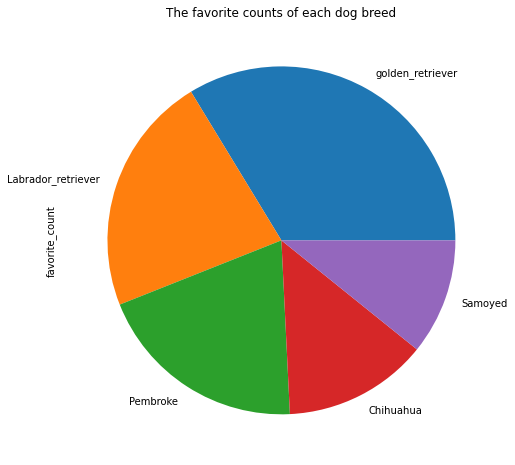

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
twitter_archive_master.groupby('p1')['favorite_count'].sum().sort_values(ascending = False).head().plot(kind = 'pie', figsize = (8,8));
plt.title('The favorite counts of each dog breed');

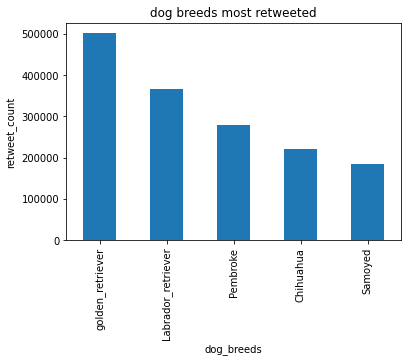

In [133]:
twitter_archive_master.groupby('p1')['retweet_count'].sum().sort_values(ascending = False).head().plot(kind = 'bar');
plt.xlabel('dog_breeds')
plt.ylabel('retweet_count')
plt.title('dog breeds most retweeted')
plt.show;

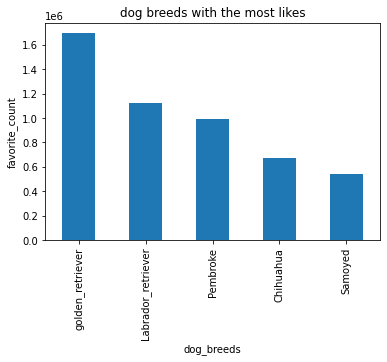

In [134]:
twitter_archive_master.groupby('p1')['favorite_count'].sum().sort_values(ascending = False).head().plot(kind = 'bar');
plt.xlabel('dog_breeds')
plt.ylabel('favorite_count')
plt.title('dog breeds with the most likes')
plt.show;

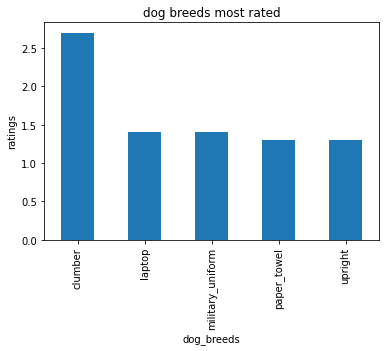

In [135]:
twitter_archive_master.groupby('p1')['ratings'].mean().sort_values(ascending = False).head().plot(kind = 'bar');
plt.xlabel('dog_breeds')
plt.ylabel('ratings')
plt.title('dog breeds most rated')
plt.show;

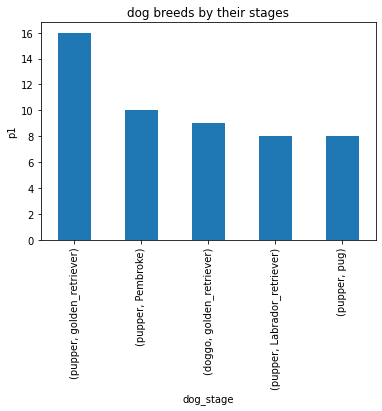

In [138]:
twitter_archive_master.groupby('dog_stage')['p1'].value_counts().sort_values(ascending = False).head().plot(kind = 'bar');
plt.xlabel('dog_stage')
plt.ylabel('p1')
plt.title('dog breeds by their stages')
plt.show;